In [1]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet

nomArch = '../Datos/Premios2020.csv' 
#-- detectando la codificación de caracteres usada ----
with open(nomArch, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df= pd.read_csv(nomArch, encoding=result['encoding'])
df.head()

,Year,Age,Actor,Sex,Film,nominations,rating,duration,genre1,genre2,release,synopsis
0,1928,44,Emil Jannings,M,The Last Command,2.0,8.0,88,Drama,History,April,A former Imperial Russian general and cousin o...
1,1928,22,Laura Gainor (aka Janet Gaynor),F,Sunrise,5.0,7.8,110,Drama,Romance,NaN,A street cleaner saves a young womans life and...
2,1929,37,Mary Pickford,F,Coquette,1.0,7.3,76,Drama,Romance,April,A flirtatious southern belle is compromised wi...
3,1929,38,Warner Baxter,M,In Old Arizona,5.0,5.8,95,Romance,Western,January,A charming happy-go-lucky bandit in old Arizon...
4,1930,62,George Arliss,M,Disraeli,3.0,6.5,90,Biography,Drama,November,Prime Minister of Great Britain Benjamin Disra...


**Discretización por Rango**

In [2]:
etiq = ["bajo","medio","alto", "muy alto"]

# Discretización por RANGO
columna = pd.cut(df["duration"],bins=len(etiq),labels=etiq)

df['duration2']= pd.Series.to_frame(columna)

print(pd.value_counts(df['duration2']))

df[['Year','Age','Actor','Sex','Film','nominations', 'duration','duration2']]


medio       92
bajo        77
alto        15
muy alto     2
Name: duration2, dtype: int64


,Year,Age,Actor,Sex,Film,nominations,duration,duration2
0,1928,44,Emil Jannings,M,The Last Command,2.0,88,bajo
1,1928,22,Laura Gainor (aka Janet Gaynor),F,Sunrise,5.0,110,bajo
2,1929,37,Mary Pickford,F,Coquette,1.0,76,bajo
3,1929,38,Warner Baxter,M,In Old Arizona,5.0,95,bajo
4,1930,62,George Arliss,M,Disraeli,3.0,90,bajo
...,...,...,...,...,...,...,...,...
181,2018,44,Olivia Colman,F,The Favourite,10.0,119,medio
182,2019,50,Renée Zellweger,F,Judy,2.0,118,medio
183,2019,45,Joaquin Phoenix,M,Joker,11.0,122,medio
184,2020,63,Frances McDormand,F,Nomadland,6.0,108,bajo


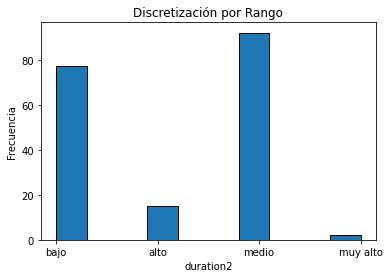

In [3]:
plt.figure()
plt.hist(df['duration2'], bins = 10, edgecolor = 'black', linewidth=1)
plt.xlabel('duration2')
plt.ylabel('Frecuencia')
plt.title('Discretización por Rango')
plt.show()

**Discretización por Frecuencia**

bajo        53
alto        47
muy alto    45
medio       41
Name: duration3, dtype: int64


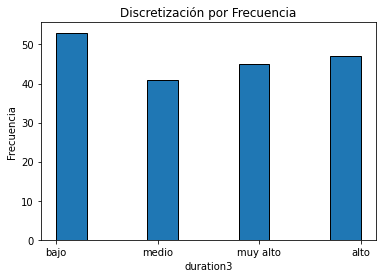

In [4]:
etiq = ["bajo","medio","alto","muy alto"]

columna = pd.qcut(df["duration"], q=len(etiq), labels=etiq)

df['duration3']= pd.Series.to_frame(columna)

#-- frecuencia con la que aparece cada valor
print(pd.value_counts(df['duration3']))

#---- Diagrama de barras -----
plt.figure()
plt.hist(df['duration3'], bins = 10, edgecolor = 'black', linewidth=1)
plt.xlabel('duration3')
plt.ylabel('Frecuencia')
plt.title('Discretización por Frecuencia')
plt.show()

**Discretización indicada por el usuario**

normal    122
breve      33
larga      31
Name: duration4, dtype: int64


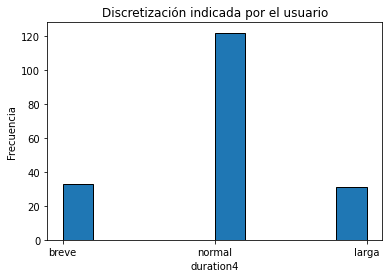

In [5]:
etiq = ["breve","normal","larga"]
valores = [-math.inf, 100, 136, math.inf]

columna = pd.cut(df["duration"],bins=valores,labels=etiq)

df['duration4']= pd.Series.to_frame(columna)

print(pd.value_counts(df['duration4']))

#---- Diagrama de barras -----
plt.figure()
plt.hist(df['duration4'], bins = 10, edgecolor = 'black', linewidth=1)
plt.xlabel('duration4')
plt.ylabel('Frecuencia')
plt.title('Discretización indicada por el usuario')
plt.show()
